In [1]:
import seaborn as sn
import matplotlib.pyplot as pp
import pandas as pd
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None

In [2]:
# Apply the default theme
sn.set_theme()

# Load an example dataset
df = pd.read_csv("ricepurity.csv")

# rename the columns to not be so shitty lmao
newNames = ['rps', 'sexuality', 'sex', 'gender', 'transgender', 'age', 'political', 'religion', 'climate_change', 'drugs', 'police', 'masturbation',
           'sex_per_month', 'sexually_free', 'kinky', 'parents_dis', 'std', 'pregnancy', 'education', 'years_apart', 'income', 'social', 'healthy']
questions = df.columns[1:]
temp = zip(df.columns[1:], newNames)
newNameMap = {k:v for (k, v) in temp}
df = df.rename(columns=newNameMap)


### Cleaning the data

In [3]:
import re

testDict = {'sexuality' : ['Homosexual', 'Heterosexual', 'Bisexual', 'Questioning', 'Asexual'],
           'sex' : ['Male', 'Female', 'Prefer not to say'],
           'gender' : ['Male', 'Female', 'Non-binary'],
           'political' : ['Left', 'Right', 'Center'],
           'education' : ['High School / GED Equivalent', 'Associate\'s Degree (2 year)', 'Bachelor\'s Degree (4 year)', 'Master\'s Degree', 'Doctoral Degree'],
           'social' : ['Extrovert', 'Introvert', 'Ambivert']}

# clean out all the non-default responses available
clean = df

# regex test data
testDf = pd.DataFrame({'sexuality' : ['Pansexual', 'pansexual', 'Asexual but aslot aivebuiwb uvbwrib ', 'between bisexual and heterosexual', 'panssexual but im extra as fuck', 'heteroflexie', 'panrom asexual']})
testDf = testDf['sexuality'].replace(to_replace=[r'.*(?i)asex.*', r'(.*(?i)pans.*)|(.*(?i)bisex.*)|(.*(?i)heteroflex.*)'], value=['Asexual', 'Bisexual'], regex=True)
print(testDf)

# Cleaning Sexuality Data
clean['sexuality'].replace(to_replace=[r'.*(?i)asex.*', r'(.*(?i)pans.*)|(.*(?i)bisex.*)|(.*(?i)heteroflex.*)'], value=['Asexual', 'Bisexual'], inplace=True, regex=True)

# Cleaning Gender Data
clean['gender'].replace(to_replace=[r'(.*(?i)agend.*)|(.*(?i)fluid.*)|(.*(?i)non.*)'])

# Cleaning Political Data
# change "liberal" to "left" and "Conservative" to "Right" --- this was due to a change in the question around 100 entries in
clean['political'].replace(['Liberal', 'Centrist', 'Conservative'], ['Left', 'Center', 'Right'], inplace=True)
# change "libertarian" to "Conservative"
clean['political'].replace(['Libertarian', 'libertarian'], ['Right', 'Right'], inplace=True)
# change remaining right options to Right
clean['political'].replace(to_replace=r'.*(?i)right.*', value='Right', inplace=True, regex=True)
# Change these left subgroups into Left - ffs guys communist and socialist are CLEARLY left, my god
clean['political'].replace(to_replace=r'(.*(?i)LEFT.*)|(.*(?i)Comm.*)|(.*(?i)anarch.*)|(.*(?i)Marx.*)|(.*(?i)Social.*)|(.*(?i)Labor.*)|(.*(?i)Prog.*)', value='Left', inplace=True, regex=True)

# Printing everything out
for name, defaults in testDict.items():
    print(name, clean.shape)
    clean = clean[clean[name].isin(defaults)]
    
print(f'Final Clean (with sanitation): {clean.shape}')
clean.head()

0    Bisexual
1    Bisexual
2     Asexual
3    Bisexual
4    Bisexual
5    Bisexual
6     Asexual
Name: sexuality, dtype: object
sexuality (1189, 24)
sex (1168, 24)
gender (1160, 24)
political (1144, 24)
education (1112, 24)
social (1090, 24)
Final Clean (with sanitation): (1086, 24)


,Timestamp,rps,sexuality,sex,gender,transgender,age,political,religion,climate_change,drugs,police,masturbation,sex_per_month,sexually_free,kinky,parents_dis,std,pregnancy,education,years_apart,income,social,healthy
0,11/15/2020 18:05:01,28,Homosexual,Male,Male,NaN,20,Left,No,Very concerned,"Marijuana, Psychedelics, Heroin & Other hard d...",Lessened,7 - 10,15 - 25 times,Yes,Yes,Yes,Very scared,Not Applicable,Bachelor's Degree (4 year),1 - 2,"$10,001 - $30,000",Introvert,Yes
1,11/15/2020 18:24:00,26,Heterosexual,Female,Female,NaN,36,Left,No,Very concerned,"Marijuana, Psychedelics",Abolished,2 - 4,1 - 2 times,No,No,Yes,A little scared,Absolutely terrified,Bachelor's Degree (4 year),10+,"$30,001 - $50,000",Introvert,Maybe
2,11/15/2020 18:24:57,36,Bisexual,Male,Male,NaN,19,Left,No,Very concerned,"Marijuana, Psychedelics, Heroin & Other hard d...",Abolished,5 - 7,9 - 15 times,Yes,Yes,Yes,Very scared,Absolutely terrified,Bachelor's Degree (4 year),1 - 2,"$0 - $10,000",Introvert,Yes
3,11/15/2020 18:25:15,26,Heterosexual,Female,Female,NaN,23,Left,No,Very concerned,"Marijuana, Psychedelics, Heroin & Other hard d...",Increased,1,3 - 8 times,Yes,Yes,No,Not at all scared,Not at all scared,Bachelor's Degree (4 year),3 - 5,"$50,001 - $80,000",Introvert,Yes
4,11/15/2020 18:30:22,46,Heterosexual,Male,Male,NaN,18,Left,No,Decently concerned,"Marijuana, Psychedelics",Left the way it is,2 - 4,9 - 15 times,Maybe,Yes,No,Not at all scared,A little scared,Bachelor's Degree (4 year),1 - 2,"$0 - $10,000",Introvert,Yes


In [4]:
for row in clean['rps']:
    if not row.isdigit():
        print(row)

84 =(
69 (I'm completely serious)


def getStats(i):
    thing = newNames[i]
    question = questions[i]
    description = clean.groupby(thing)['rps'].describe()
    count = description['count']
    percentage = count / clean.shape[0]
    avgRPS = description['mean']
    
    build = pd.DataFrame(data={'percentage' : round(percentage * 100, 2), 'count' : round(count), 'avg RPS': round(avgRPS, 2)})
    print(question)
    print(build)
    print('\n')

for i in range(11, len(newNames)):
    print(newNames[i])
    getStats(i)
    
# clean.groupby('political')['rps'].describe()

### Fixing up NaN and Types

In [5]:
# use regex to convert rps and age to int-castable formats
clean['rps'] = clean['rps'].str.extract(r'(\d+)')
# Change the types so that seaborn doesn't have a sea-zure
clean[['rps', 'age']] = clean[['rps', 'age']].astype('int32')

# Fill the initial trangender field with 'no'. Not the best practice, but I added the question in about 200 responses in ;___;


## Plotting

In [6]:
sn.set_style('ticks')
sn.set_palette('colorblind')

dataframe_labels = {
    'climate_change' : {'Very concerned' : 'very', 'Decently concerned' : 'decently', 'Somewhat concerned' : 'somewhat', 'A little concerned' : 'very little', 'Not at all concerned' : 'not at all'},
    'police' : {'Abolished' : 'abolished', 'Lessened' : 'lessened', 'Left the way it is' : 'no change', 'Increased' : 'increased', 'Highly increased' : 'very increased'},
    'sex_per_month' : {'I have never had sex' : 'Virgin', 'I have had sex, but not recently, or not frequent enough to be monthly' : '< 1',
                       '1 - 2 times' : '1 - 2', '3 - 8 times' : '3 - 8', '9 - 15 times' : '9 - 15', '15 - 25 times' : '15 - 25', '25+ times' : '25+'},
    'std' : {'Not at all scared' : 'no fear', 'A little scared': 'little fear', 'Somewhat scared': 'some fear', 'Decently scared': 'moderate fear', 
             'Very scared': 'lots of fear', 'Absolutely terrified': 'extreme fear'},
    'pregnancy' : {'Not Applicable' : 'not applicable', 'Not at all scared' : 'no fear', 'A little scared': 'little fear', 'Somewhat scared': 'some fear', 'Decently scared': 'moderate fear', 
                   'Very scared': 'lots of fear', 'Absolutely terrified': 'extreme fear'},
    'education' : {'High School / GED Equivalent': 'high school', 'Associate\'s Degree (2 year)': 'associate\'s', "Bachelor's Degree (4 year)": 'bachelor\'s', 
                   "Master's Degree": 'master\'s', "Doctoral Degree": 'doctoral'},
    'years_apart' : {'0 (I have never lived apart from my parents)': '0', '1 - 2' : '1 - 2', '3 - 5' : '3 - 5', '6 - 10' : '6 - 10', '10+' : '10+'},
    'income' : {'$0 - $10,000': '< 10,000', '$10,001 - $30,000' : '10,000 - 30,000', '$30,001 - $50,000': '30,000 - 50,000', 
                '$50,001 - $80,000' : '50,000 - 80,000', '$80,001 - $120,000' : '80,000 - 120,000', '$120,001 - $160,000' : '120,000 - 160,000', 
                '$160,001+' : '> 160,000'}
}

plot_order = {'climate_change' : ['very', 'decently', 'somewhat', 'very little', 'not at all'], 
               'police' : ['abolished', 'lessened', 'no change', 'increased', 'very increased'][::-1],
               'masturbation' : ['0', '1', '2 - 4', '5 - 7', '7 - 10', '10+'][::-1],
               'sex_per_month' : ['Virgin', '< 1', '1 - 2', '3 - 8', '9 - 15', '15 - 25', '25+'][::-1],
               'std' : ['no fear', 'little fear', 'some fear', 'moderate fear', 'lots of fear', 'extreme fear'][::-1],
               'pregnancy' : ['not applicable', 'no fear', 'little fear', 'some fear', 'moderate fear', 'lots of fear', 'extreme fear'][::-1],
               'education' : ['high school', 'associate\'s', 'bachelor\'s', 'master\'s', 'doctoral'][::-1],
               'years_apart' : ['0', '1 - 2', '3 - 5', '6 - 10', '10+'][::-1],
               'income' : ['< 10,000', '10,000 - 30,000', '30,000 - 50,000', '50,000 - 80,000', '80,000 - 120,000', '120,000 - 160,000', '> 160,000'][::-1]}

plot_names = {'rps' : 'Rice Purity Score', 'sexuality' : 'Sexuality', 'sex' : 'Sex', 'gender' : 'Gender', 'transgender' : 'Transgender',
              'age' :'Age', 'political' : 'Political Leaning', 'religion' : 'Religious Attitude', 'climate_change' : 'Concern for climate change', 
              'drugs' : 'Decriminalization of Drugs', 'police' : 'Police Funding Attitude', 'masturbation' : 'Weekly Masturbation', 'sex_per_month' : 'Sex Per Month',
              'sexually_free' : 'Sexual Freedom', 'kinky' : 'Kinkiness', 'parents_dis' : 'Parent\'s Disappointment',
              'std' : 'Fear of STDs', 'pregnancy' : 'Fear of Pregnancy', 'education' : 'Education Level', 'years_apart' : 'Years Apart from Parents',
              'income' : 'Annual Income', 'social' : 'Social Category', 'healthy' : 'Healthiness'}

In [7]:
for category, question in dataframe_labels.items():
    clean[category].replace(list(question.keys()), list(question.values()), inplace=True) 
        

### RPS & Various Graphs

In [8]:
# fig, ax = pp.subplots(5, 4, figsize=(25, 30))

#         ['rps', 'sexuality', 'sex', 'gender', 'transgender', 'age', 'political', 'religion', 'climate_change', 'drugs', 'poilce', 'masturbation',
#          'sex_per_month', 'sexually_free', 'kinky', 'parents_dis', 'std', 'pregnancy', 'education', 'years_apart', 'income', 'social', 'healthy']

# clean['sex'] = clean['sex'][clean['sex'] != 'Prefer not to say']

# categories = [['sex', 'political', 'gender', 'transgender'], 
#               ['sexuality', 'religion', 'climate_change', 'police'], 
#               ['masturbation', 'sex_per_month', 'sexually_free', 'kinky'],
#               ['parents_dis', 'std', 'pregnancy', 'education'],
#               ['years_apart', 'income', 'social', 'healthy']]

# pp.subplots_adjust(wspace=0.5, hspace=0.5)

# for row in range(5):
#     for col in range(4):
#         category = categories[row][col]
#         axis = ax[row][col]
#         distinct = len(pd.unique(clean[category]))
#         if distinct > 3:
#             if category in plot_order:
#                 sn.boxplot(data=clean, x='rps', y=category, ax=ax[row][col], order=plot_order[category])
#             else:
#                 sn.boxplot(data=clean, x='rps', y=category, ax=ax[row][col])
#             axis.set_ylabel(category)
#         else:
#             sn.histplot(data=clean, x='rps', hue=category, stat='density', kde=True, common_norm = False, ax=axis)
#         axis.set_title(f'Rice Purity Score vs. {plot_names[category]}')
#         axis.set_xlabel('Rice Purity Score')
# sn.despine()

# sn.histplot(data=clean, x='rps', kde=True, bins=12, stat='density', ax=ax[0])
# ax[0].set_title('Rice Purity Score Distribution')
# ax[0].set_xlabel('Rice Purity Score')

# condition = clean['sex'] != 'Prefer not to say'
# sn.histplot(data=clean[['rps', 'sex']][condition], x='rps', hue='sex', stat='density', kde=True, common_norm = False, ax=ax[1])
# ax[1].set_title('Rice Purity Score vs. Sex')
# ax[1].set_xlabel('Rice Purity Score')

# sn.histplot(data=clean[['rps', 'political']][condition], x='rps', hue='political', element='step', stat='density', kde=True, common_norm = False)
# ax[2].legend(['Right', 'Center', 'Left'], loc='upper left')
# ax[2].set_title('Rice Purity Score vs. Political Leaning')
# ax[2].set_xlabel('Rice Purity Score')

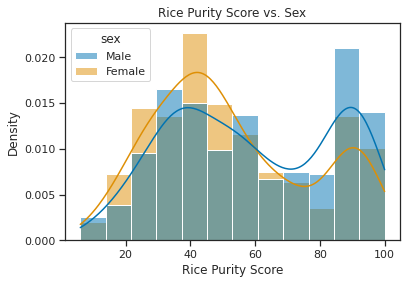

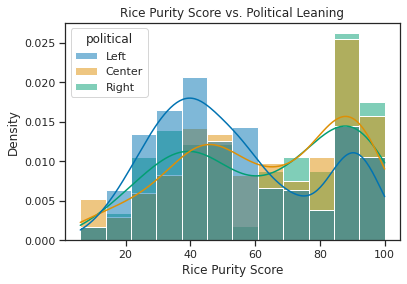

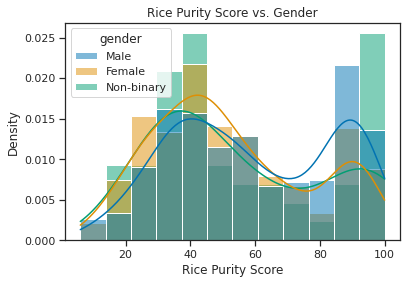

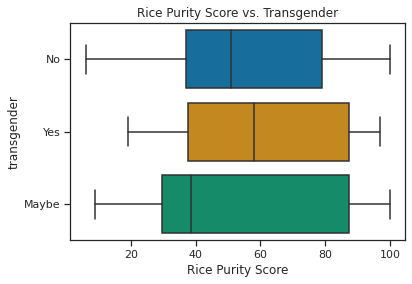

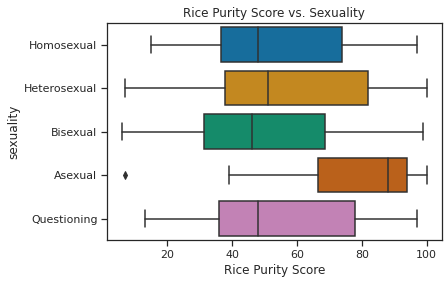

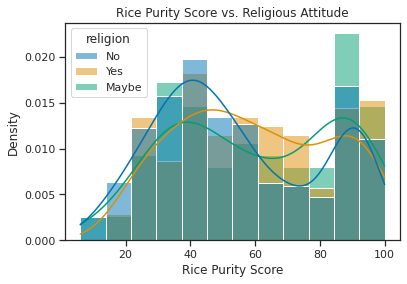

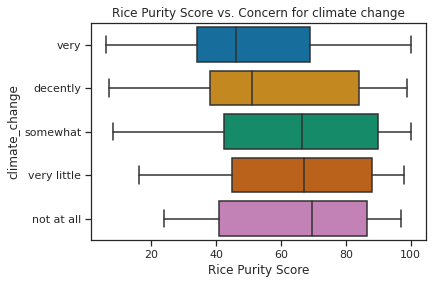

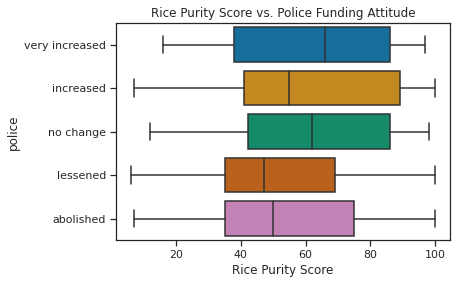

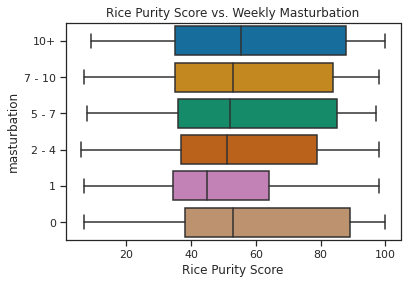

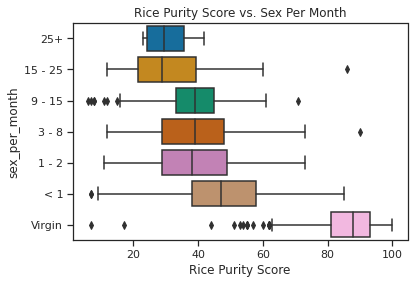

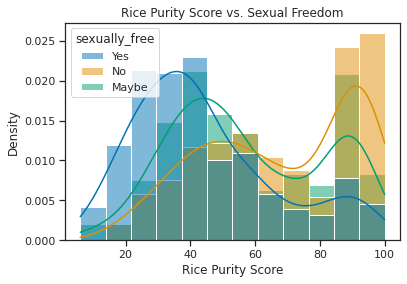

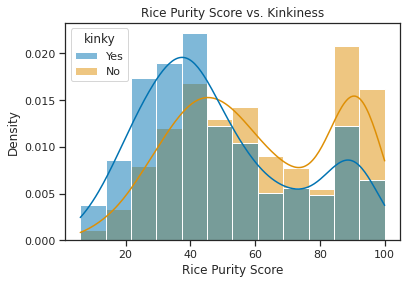

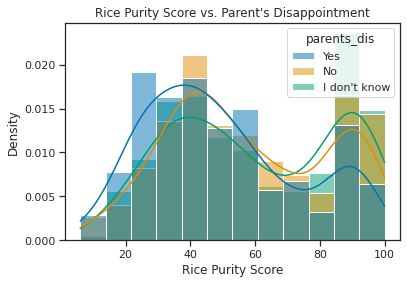

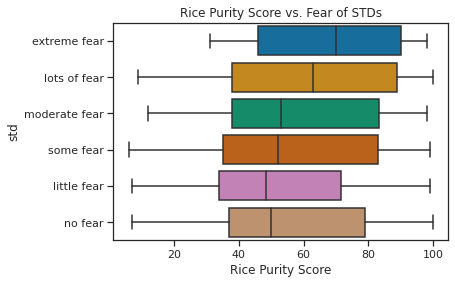

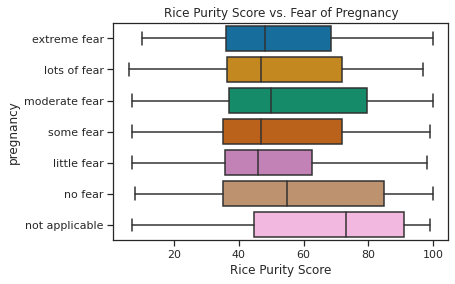

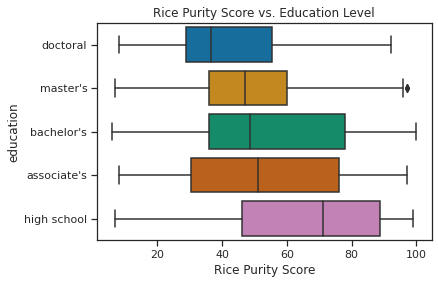

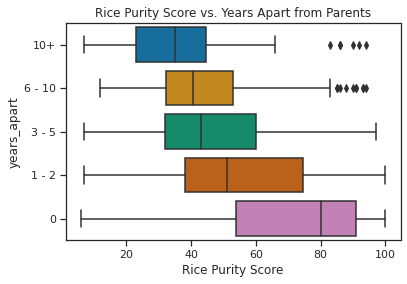

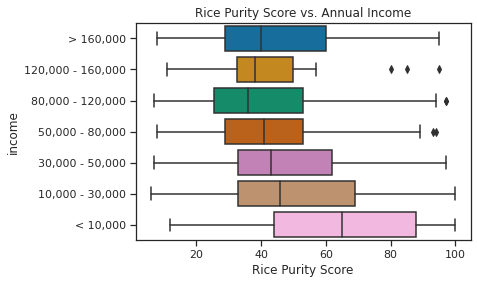

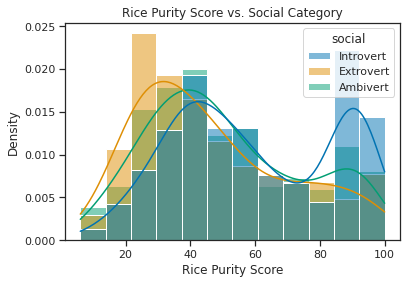

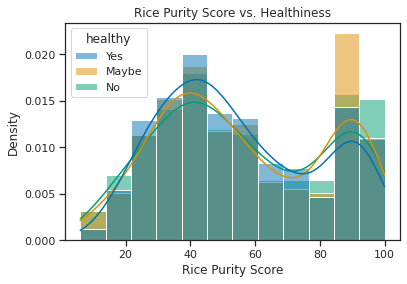

<Figure size 432x288 with 0 Axes>

In [9]:
clean['sex'] = clean['sex'][clean['sex'] != 'Prefer not to say']

categories = [['sex', 'political', 'gender', 'transgender'], 
              ['sexuality', 'religion', 'climate_change', 'police'], 
              ['masturbation', 'sex_per_month', 'sexually_free', 'kinky'],
              ['parents_dis', 'std', 'pregnancy', 'education'],
              ['years_apart', 'income', 'social', 'healthy']]

pp.subplots_adjust(wspace=0.5, hspace=0.5)

for row in range(5):
    for col in range(4):
        category = categories[row][col]
        distinct = len(pd.unique(clean[category]))
        if distinct > 3:
            if category in plot_order:
                sn.boxplot(data=clean, x='rps', y=category, order=plot_order[category])
            else:
                sn.boxplot(data=clean, x='rps', y=category)
            pp.ylabel(category)
        else:
            sn.histplot(data=clean, x='rps', hue=category, stat='density', kde=True, common_norm = False)
        pp.title(f'Rice Purity Score vs. {plot_names[category]}')
        pp.xlabel('Rice Purity Score')
        pp.show()
sn.despine()

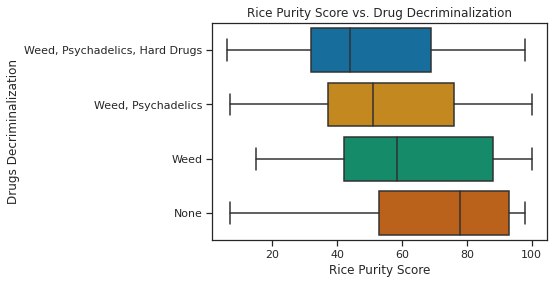

In [10]:
options = ["I don't think any of these drugs should be decriminalized", "Marijuana", "Marijuana, Psychedelics", "Marijuana, Psychedelics, Heroin & Other hard drugs"]
drugsDF = clean[clean['drugs'].isin(options)]
drugsDF['drugs'].replace(["I don't think any of these drugs should be decriminalized", "Marijuana", "Marijuana, Psychedelics", "Marijuana, Psychedelics, Heroin & Other hard drugs"], 
                ["None", "Weed", "Weed, Psychadelics", "Weed, Psychadelics, Hard Drugs"], inplace=True)
sn.boxplot(data=drugsDF, x='rps', y='drugs')
pp.ylabel('Drugs Decriminalization')

pp.title(f'Rice Purity Score vs. Drug Decriminalization')
pp.xlabel('Rice Purity Score')
pp.show()

### Sex vs. RPS

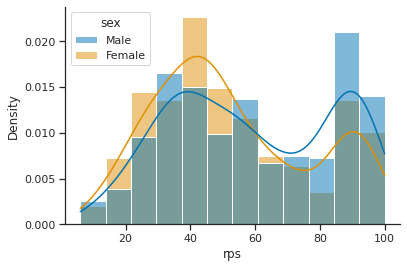

In [11]:
# plot rps vs sex (filter out 6 "prefer not to say" responses for sex)
condition = clean['sex'] != 'Prefer not to say'
grid = sn.histplot(data=clean[['rps', 'sex']][condition], x='rps', hue='sex', stat='density', kde=True, common_norm = False)
sn.despine()

### Correlation between Age and RPS

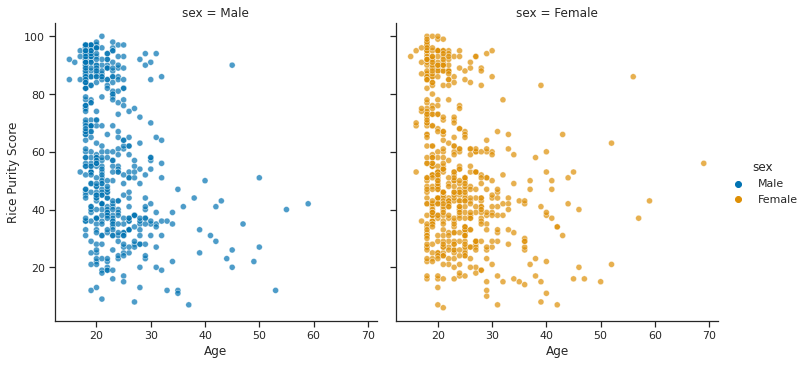

In [12]:
grid = sn.relplot(data = clean[['rps', 'age', 'sex']][condition], x='age', y='rps', alpha=.7, col='sex', hue='sex')
grid.set_axis_labels('Age', 'Rice Purity Score')

In [13]:
grouped = clean.copy()
grouped['rpsGroup'] = clean.apply(lambda x: 1 if x['rps'] <= 25 else (2 if x['rps'] <= 50 else (3 if x['rps'] <= 75 else 4)), axis=1)
grouped['ageGroup'] = clean.apply(lambda x: 1 if x['age'] <= 18 else (2 if x['age'] <= 24 else (3 if x['age'] <= 30 else 4)), axis=1)
um = grouped.groupby(['ageGroup', 'rpsGroup'], as_index=True).rps.describe()
um

count       mean       std   min    25%   50%    75%    max
ageGroup rpsGroup                                                             
1        1           4.0  19.500000  3.511885  16.0  16.75  19.5  22.25   23.0
         2          30.0  37.633333  7.392836  26.0  31.25  36.0  44.75   50.0
         3          45.0  65.088889  7.650972  51.0  58.00  67.0  71.00   75.0
         4         103.0  89.980583  5.713727  76.0  86.00  91.0  95.00  100.0
2        1          48.0  20.000000  4.806910   6.0  17.75  21.0  23.25   25.0
         2         207.0  39.724638  6.509629  26.0  35.50  41.0  45.00   50.0
         3         136.0  60.308824  6.974573  51.0  54.00  58.5  67.00   75.0
         4         162.0  89.456790  5.682160  76.0  86.00  90.0  94.00  100.0
3        1          25.0  19.360000  4.948737   8.0  17.00  20.0  24.00   25.0
         2         127.0  36.519685  6.627085  26.0  31.00  36.0  41.00   50.0
         3          54.0  58.481481  6.317812  51.0  53.00  59.0  62.00   75.0
         4          26.0  88.153846  5.311816  76.0  85.00  89.0  92.75   97.0
4        1          31.0  16.161290  5.190355   7.0  12.00  16.0  20.50   25.0
         2          64.0  37.765625  6.661289  26.0  32.75  38.5  42.25   50.0
         3          18.0  58.444444  5.792716  51.0  53.00  58.5  63.75   67.0
         4           6.0  86.166667  5.528713  78.0  83.75  86.0  89.00   94.0

### Political Leaning and RPS

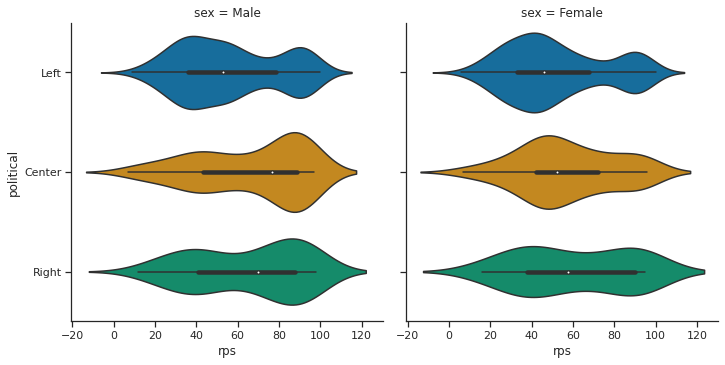

In [14]:
plot = sn.catplot(data=clean[['rps', 'political', 'sex']][condition], x='rps', y='political', kind='violin', 
                  
                 col='sex')

### Education Level and RPS

plot = sn.histplot(data=clean[['rps', 'political']][condition], x='rps', hue='political', element='step', stat='density', kde=True, common_norm = False)
pp.legend(['Right', 'Center', 'Left'], loc='upper left')
sn.despine()

## Overall Statistics

### Rice Purity Score vs. Age

In [15]:
rpsVage = clean[['rps', 'age']]
stats = rpsVage.describe()
corr = rpsVage.corr()
stats
corr

,rps,age
rps,1.00000,-0.36224
age,-0.36224,1.00000


In [16]:
clean.describe()

,rps,age
count,1086.000000,1086.000000
mean,55.561694,23.731123
std,24.778937,6.656931
min,6.000000,15.000000
25%,36.000000,19.000000
50%,51.000000,22.000000
75%,80.750000,26.000000
max,100.000000,69.000000


In [17]:
clean[clean['age'] < 18].shape

(18, 24)

In [18]:
description = clean.groupby(by='drugs')['rps'].describe()
count = description['count']
percentage = count / clean.shape[0]
avgRPS = description['mean']
    
build = pd.DataFrame(data={'percentage' : round(percentage * 100, 2), 'count' : round(count), 'avg RPS': round(avgRPS, 2)})
print(question)
print(build)
print('\n')

{'$0 - $10,000': '< 10,000', '$10,001 - $30,000': '10,000 - 30,000', '$30,001 - $50,000': '30,000 - 50,000', '$50,001 - $80,000': '50,000 - 80,000', '$80,001 - $120,000': '80,000 - 120,000', '$120,001 - $160,000': '120,000 - 160,000', '$160,001+': '> 160,000'}
                                                    percentage  count  avg RPS
drugs                                                                         
Heroin & Other hard drugs                                 0.83    9.0    81.78
I don't think any of these drugs should be decr...        5.62   61.0    70.13
Marijuana                                                22.10  240.0    62.42
Marijuana, Heroin & Other hard drugs                      0.18    2.0    97.50
Marijuana, I don't think any of these drugs sho...        0.18    2.0    63.50
Marijuana, Psychedelics                                  26.98  293.0    54.66
Marijuana, Psychedelics, Heroin & Other hard drugs       43.46  472.0    50.09
Psychedelics                

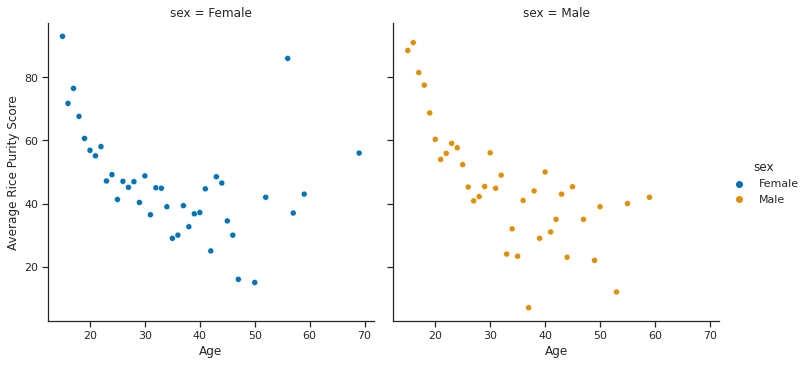

In [20]:
ageAgg = clean.groupby(by=['sex', 'age']).mean()
grid = sn.relplot(data = ageAgg, x='age', y='rps', col='sex', hue='sex')
grid.set_axis_labels('Age', 'Average Rice Purity Score')

In [24]:
clean.groupby('sexuality').head()

,Timestamp,rps,sexuality,sex,gender,transgender,age,political,religion,climate_change,drugs,police,masturbation,sex_per_month,sexually_free,kinky,parents_dis,std,pregnancy,education,years_apart,income,social,healthy
0,11/15/2020 18:05:01,28,Homosexual,Male,Male,NaN,20,Left,No,very,"Marijuana, Psychedelics, Heroin & Other hard d...",lessened,7 - 10,15 - 25,Yes,Yes,Yes,lots of fear,not applicable,bachelor's,1 - 2,"10,000 - 30,000",Introvert,Yes
1,11/15/2020 18:24:00,26,Heterosexual,Female,Female,NaN,36,Left,No,very,"Marijuana, Psychedelics",abolished,2 - 4,1 - 2,No,No,Yes,little fear,extreme fear,bachelor's,10+,"30,000 - 50,000",Introvert,Maybe
2,11/15/2020 18:24:57,36,Bisexual,Male,Male,NaN,19,Left,No,very,"Marijuana, Psychedelics, Heroin & Other hard d...",abolished,5 - 7,9 - 15,Yes,Yes,Yes,lots of fear,extreme fear,bachelor's,1 - 2,"< 10,000",Introvert,Yes
3,11/15/2020 18:25:15,26,Heterosexual,Female,Female,NaN,23,Left,No,very,"Marijuana, Psychedelics, Heroin & Other hard d...",increased,1,3 - 8,Yes,Yes,No,no fear,no fear,bachelor's,3 - 5,"50,000 - 80,000",Introvert,Yes
4,11/15/2020 18:30:22,46,Heterosexual,Male,Male,NaN,18,Left,No,decently,"Marijuana, Psychedelics",no change,2 - 4,9 - 15,Maybe,Yes,No,no fear,little fear,bachelor's,1 - 2,"< 10,000",Introvert,Yes
5,11/15/2020 18:30:56,41,Bisexual,Male,Male,NaN,19,Left,No,very,"Marijuana, Psychedelics, Heroin & Other hard d...",lessened,10+,9 - 15,Maybe,Yes,No,little fear,no fear,bachelor's,1 - 2,"< 10,000",Introvert,Maybe
6,11/15/2020 18:38:51,97,Bisexual,Male,Male,NaN,20,Left,Yes,decently,Marijuana,lessened,0,Virgin,No,No,No,no fear,no fear,bachelor's,1 - 2,"< 10,000",Introvert,Yes
7,11/15/2020 18:40:17,49,Bisexual,Female,Male,NaN,22,Left,No,very,Marijuana,lessened,1,1 - 2,No,No,I don't know,little fear,not applicable,master's,1 - 2,"< 10,000",Extrovert,Yes
8,11/15/2020 18:42:17,33,Heterosexual,Male,Male,NaN,18,Left,Maybe,decently,"Marijuana, Psychedelics",lessened,7 - 10,3 - 8,Yes,Yes,No,moderate fear,moderate fear,bachelor's,1 - 2,"< 10,000",Extrovert,Yes
9,11/15/2020 18:44:16,90,Heterosexual,Male,Male,NaN,18,Left,No,very,"Marijuana, Psychedelics, Heroin & Other hard d...",increased,2 - 4,Virgin,Yes,No,No,no fear,no fear,bachelor's,1 - 2,"< 10,000",Introvert,Yes


parents_dis
Do you think your parents be disappointed in you if they knew the details of your sex life?
              percentage  count  avg RPS
parents_dis                             
I don't know: 22.93  249.0    60.09
No: 44.01  478.0    57.71
Yes: 33.06  359.0    49.56


std
How scared are you of catching STDs/STIs?
               percentage  count  avg RPS
std                                      
extreme fear:         2.21   24.0    67.00
little fear:         27.26  296.0    53.03
lots of fear:         3.41   37.0    62.00
moderate fear:       11.79  128.0    57.99
no fear:             42.54  462.0    55.49
some fear:          12.80  139.0    55.27


pregnancy
How scared are you of having/causing an unwanted pregnancy?
                percentage  count  avg RPS
pregnancy                                 
extreme fear:         11.33  123.0    52.28
little fear:          17.68  192.0    50.95
lots of fear:          8.01   87.0    53.93
moderate fear:        13.08  142.0    55.29
no fear:              29.56  321.0    57.56
not applicable:        9.21  100.0    67.33
some fear:           11.14  121.0    52.69


education
What is the highest education level you have completed OR are currently pursuing?
             percentage  count  avg RPS
education                              
associate's:        7.27   79.0    53.39
bachelor's:        57.09  620.0    54.57
doctoral:           3.68   40.0    44.02
high school:       17.86  194.0    66.13
master's:         14.09  153.0    50.33


years_apart
How many years have you lived apart from your parents?
             percentage  count  avg RPS
years_apart                            
0:                 29.56  321.0    72.15
1 - 2:             25.32  275.0    56.11
10+:               11.69  127.0    36.72
3 - 5:             21.09  229.0    48.34
6 - 10:            12.34  134.0    44.90


income
What is your annual income?
                   percentage  count  avg RPS
income                                       
10,000 - 30,000:         19.43  211.0    51.18
120,000 - 160,000:        1.75   19.0    43.00
30,000 - 50,000:         14.09  153.0    47.92
50,000 - 80,000:         10.87  118.0    44.33
80,000 - 120,000:         4.97   54.0    42.15
< 10,000:                46.22  502.0    64.77
> 160,000:                2.67   29.0    47.28


social
Would you say you are a(n):
           percentage  count  avg RPS
social                               
Ambivert:        27.62  300.0    50.86
Extrovert:       12.15  132.0    46.59
Introvert:       60.22  654.0    59.53


healthy
Would you consider yourself a healthy person?
         percentage  count  avg RPS
healthy                            
Maybe:         30.11  327.0    56.29
No:            21.64  235.0    56.31
Yes:           48.25  524.0    54.77


None								70.13
Marijuana							62.42
Marijuana, Psychedelics					54.66
Marijuana, Heroin & Other hard drugs			97.50
Marijuana, Psychedelics, Heroin & Other hard drugs	50.09
Psychedelics							44.25
Psychedelics, Heroin & Other hard drugs			62.33
Heroin & Other hard drugs					81.78